In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
def make_connection_with_db():
    import mysql.connector  
    connection_mydb = mysql.connector.connect(
        host = 'localhost', 
        user = 'root', 
        password = '',
        database = 'wp-ecommerce'
    )
    cursor = connection_mydb.cursor(dictionary=True)
    return connection_mydb, cursor

In [3]:
def get_users_profiles():
    df = pd.DataFrame(columns=['user_id', 'country', 'age', 'gender'])
    _,cursor = make_connection_with_db()
    sql="SELECT ID FROM wp_users"
    
    cursor.execute(sql)
    
    users_results = cursor.fetchall()
    
    for user in users_results:
        user_id = user['ID']
        sql = "SELECT meta_value FROM wp_usermeta WHERE user_id=(%s) and meta_key='country'"
        param = (user_id,)
        cursor.execute(sql, param)
        result = cursor.fetchall()
        if result != None and len(result) > 0 :
            country = result[0]['meta_value']
        else:
            country='Unknown'
    
        sql = "SELECT meta_value FROM wp_usermeta WHERE user_id=(%s) and meta_key='age '"
        param = (user_id,)
        cursor.execute(sql, param)
        result = cursor.fetchall()
        if result != None and len(result) > 0 :
            age = result[0]['meta_value']
        else:
            age='Unknown'
    
        sql = "SELECT meta_value FROM wp_usermeta WHERE user_id=(%s) and meta_key='gender'"
        param = (user_id,)
        cursor.execute(sql, param)
        result = cursor.fetchall()
        if result != None and len(result) > 0 :
            gender = result[0]['meta_value']
        else:
            gender='Unknown'
    
        obj = {
            "user_id": [user['ID']],
            "country": [country],
            "age": [age],
            "gender": [gender],
        }
    
        df_obj = pd.DataFrame(obj)
        df = pd.concat([df,df_obj], ignore_index = True)

    df.drop(df[df['country']=='Unknown'].index)
    df.drop(df[df['age']=='Unknown'].index)
    df.drop(df[df['gender']=='Unknown'].index)

    df['age']=pd.to_numeric(df['age'])

    return df

    

In [4]:
df_profile = get_users_profiles()
df_profile


,user_id,country,age,gender
0,1501,JO,33,ذكر
1,1784,JO,30,ذكر
2,1109,AE,37,انثى
3,112,BH,55,انثى
4,1115,JO,29,ذكر
...,...,...,...,...
1497,892,AE,30,انثى
1498,91,SA,41,ذكر
1499,910,BH,44,انثى
1500,931,SA,48,انثى


In [5]:
def show_users_age_his():
    df_profile = get_users_profiles()
    df_age = df_profile['age']
    df_age.hist(bins=[0,10,20,30,40,50,60,70,80])
    plt.xlabel('age')
    plt.ylabel('Count')
    plt.title('Users Age Histogram')
    plt.show()

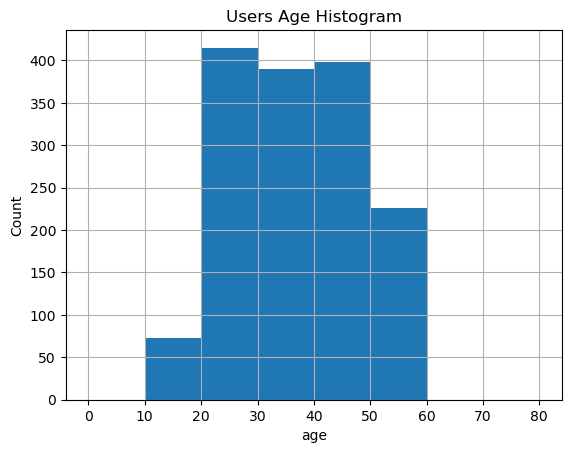

In [6]:
show_users_age_his()

In [7]:
def show_users_age_density():
    
    df_profile = get_users_profiles()
    
    df_age = df_profile['age']
    
    df_age.plot(kind='density')
    
    plt.xlabel("Age")
    
    plt.ylabel("Density")
    
    plt.title("Users Age Density")
    plt.show()

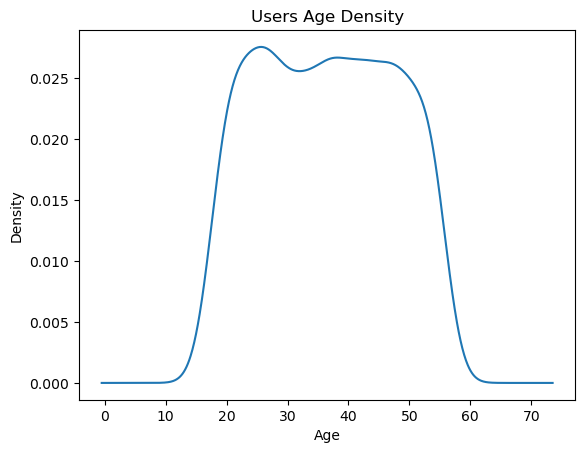

In [8]:
 show_users_age_density()

In [9]:
pip install arabic-reshaper

In [10]:
pip install python-bidi

Note: you may need to restart the kernel to use updated packages.


In [11]:
def show_users_gender_pie():
    
    df_profile = get_users_profiles()
    
    df_gender = df_profile[['gender','user_id']].groupby('gender').count()
    print(df_gender)
    
    import arabic_reshaper
    from bidi.algorithm import get_display
    
    df_gender = df_gender.reset_index()
    print(df_gender)
    
    df_gender['gender'] = df_gender['gender'].apply(lambda a: get_display(arabic_reshaper.reshape(a)))
    
    plt.pie(df_gender['user_id'], labels = df_gender['gender'], autopct='%1.1f%%')
    
    plt.title('Gender Pie')
    
    plt.show()

        user_id
gender         
انثى        784
ذكر         718
  gender  user_id
0   انثى      784
1    ذكر      718


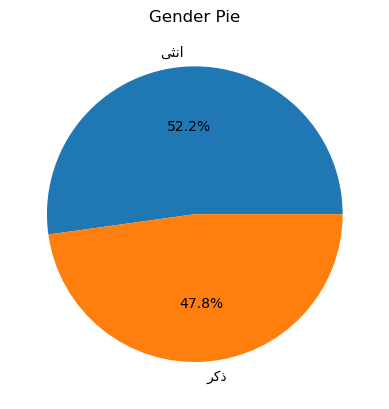

In [12]:
show_users_gender_pie()

In [28]:
def show_users_gender_countplot():
    
    import arabic_reshaper
    from bidi.algorithm import get_display
    
    df_profile = get_users_profiles()
    
    plt.subplots(figsize=(8, 6))
    
    plt.title("Users Gender Count")
    
    df_profile['gender'] = df_profile['gender'].apply(lambda a: get_display(arabic_reshaper.reshape(a)))
    
    ax = sns.countplot(x=df_profile['gender'])
    
    ax.bar_label(ax.containers[0])
    
    plt.show()

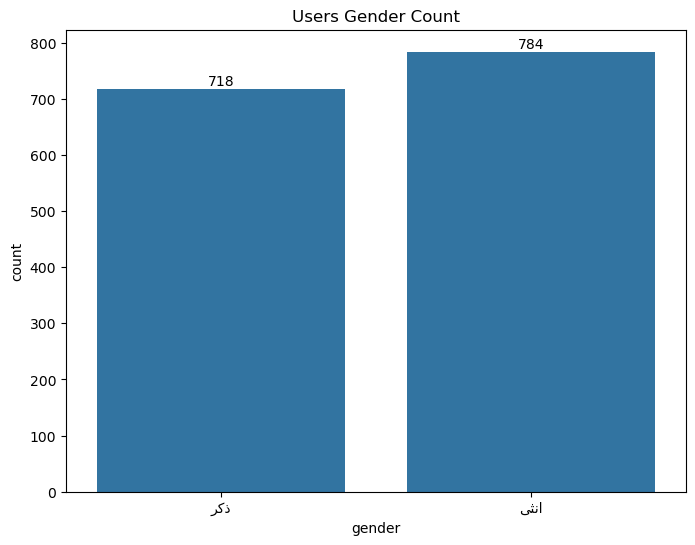

In [30]:
show_users_gender_countplot()